In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
listing = pd.read_csv("C:/Users/Super User/Desktop/Sem2 courses/CZ1015/listings.csv")

In [3]:
listing = listing[listing['number_of_reviews']>30]


In [4]:
listing["experiences_offered"].value_counts(dropna=False)

none    822
Name: experiences_offered, dtype: int64

In [5]:
listing=listing.drop('experiences_offered',axis=1)

### Analysis for the first model

In [6]:
listing['price'].isnull().sum()

0

In [7]:
listing['price']=listing['price'].str.replace(',','')
listing['price']=listing['price'].str.replace('$','')
listing['price'] = listing['price'].astype(float)

In [8]:
listing['price']

0        85.0
1       150.0
4       450.0
6        80.0
7        60.0
        ...  
3790    175.0
3793    109.0
3796     85.0
3798     77.0
3812     95.0
Name: price, Length: 822, dtype: float64

In [9]:
listing = listing.reset_index(drop=True)

In [10]:
amenities = pd.DataFrame(listing[["amenities"]])
amenities['amenities'] = amenities['amenities'].astype(str)
amenities['amenities'] = amenities['amenities'].apply(lambda x: x.replace('{',''))
amenities['amenities'] = amenities['amenities'].apply(lambda x: x.replace('}',''))
amenities['amenities'] = amenities['amenities'].apply(lambda x: x.replace('"',''))
amenities_list = amenities['amenities'].tolist()
amenities_string = ','.join(amenities_list)
print(amenities_string)
x = amenities_string.split(',')
amenities_set=set(x)
amenities_set.remove('')
amenities_set

TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,TV,Internet,Wireless Internet,Kitchen,Free Parking on Premises,Buzzer/Wireless Intercom,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Safety Card,Fire Extinguisher,Essentials,TV,Cable TV,Internet,Wireless Internet,Kitchen,Heating,Family/Kid Friendly,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Fire Extinguisher,Essentials,Shampoo,Wireless Internet,Free Parking on Premises,Heating,Smoke Detector,First Aid Kit,Essentials,Shampoo,Wireless Internet,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Essentials,Shampoo,TV,Internet,Wireless Internet,Kitchen,Free Parking on Premises,Buzzer/Wireless Intercom,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Safety Card,Fire Extinguisher,Essentials,TV,Cable TV,Internet,Wireless Internet,Kitchen,Free Parking on Premises,Heating,Was

KeyError: ''

In [11]:
y=len(amenities_set)
y

41

In [12]:
amenities_score_list=[]
for var in amenities_list:
    amenities_each = var.split(',')
    #print(amenities_each)
    amenities_score=len(amenities_each)
    #print(amenities_score)
    amenities_score_list.append(amenities_score)

print(amenities_score_list)
print(len(amenities_score_list))


[10, 16, 13, 7, 7, 16, 21, 14, 8, 6, 14, 13, 19, 17, 17, 16, 18, 8, 10, 7, 17, 12, 8, 13, 11, 23, 24, 12, 10, 15, 19, 15, 14, 16, 23, 13, 12, 9, 8, 8, 17, 7, 21, 12, 13, 16, 16, 9, 13, 18, 10, 18, 14, 17, 7, 15, 11, 12, 14, 9, 23, 15, 18, 17, 17, 15, 16, 16, 13, 24, 12, 14, 18, 10, 24, 12, 13, 11, 20, 15, 16, 14, 22, 18, 15, 16, 20, 11, 16, 18, 18, 15, 14, 14, 14, 14, 13, 6, 13, 6, 8, 20, 7, 16, 10, 16, 17, 12, 18, 22, 12, 13, 11, 18, 12, 7, 15, 13, 17, 21, 14, 8, 21, 14, 16, 16, 19, 14, 16, 12, 22, 20, 12, 12, 22, 12, 16, 15, 6, 15, 12, 19, 13, 14, 18, 18, 12, 19, 16, 13, 14, 13, 12, 17, 7, 18, 15, 17, 21, 8, 15, 15, 22, 19, 14, 14, 15, 2, 22, 16, 17, 22, 21, 12, 15, 17, 13, 12, 9, 25, 14, 12, 20, 15, 16, 19, 21, 15, 17, 5, 11, 14, 8, 9, 11, 11, 8, 15, 14, 12, 11, 16, 11, 6, 16, 15, 12, 14, 15, 12, 14, 13, 11, 14, 15, 11, 17, 17, 9, 3, 13, 17, 16, 5, 18, 11, 20, 20, 11, 4, 10, 11, 7, 12, 7, 8, 6, 21, 14, 15, 12, 15, 6, 14, 12, 14, 15, 18, 16, 14, 15, 12, 18, 15, 17, 15, 19, 16, 24, 14

In [13]:
listing['Amenities score (out of 41)'] = amenities_score_list
listing['Amenities score (out of 41)']

0      10
1      16
2      13
3       7
4       7
       ..
817    18
818    13
819    15
820    19
821    19
Name: Amenities score (out of 41), Length: 822, dtype: int64

In [14]:
listing["review_scores_rating"].describe()

count    822.000000
mean      95.065693
std        3.354865
min       77.000000
25%       94.000000
50%       96.000000
75%       97.000000
max      100.000000
Name: review_scores_rating, dtype: float64

In [15]:
listing["price"].describe()

count    822.000000
mean     108.538929
std       65.862721
min       25.000000
25%       70.000000
50%       95.000000
75%      125.000000
max      999.000000
Name: price, dtype: float64

In [16]:
listing=listing.reset_index(drop=True)
listing['extra_people']=listing['extra_people'].str.replace(',','')
listing['extra_people']=listing['extra_people'].str.replace('$','')
listing['extra_people']=listing['extra_people'].astype(float)
listing['host_response_rate']=listing['host_response_rate'].str.replace('%','')
listing['host_response_rate']=listing['host_response_rate'].astype(float)

In [17]:
listing['host_response_rate'].describe()

count    794.000000
mean      97.166247
std        8.006307
min       33.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: host_response_rate, dtype: float64

In [18]:
listing['number_of_reviews'].describe()

count    822.000000
mean      74.485401
std       53.658474
min       31.000000
25%       41.000000
50%       56.000000
75%       86.000000
max      474.000000
Name: number_of_reviews, dtype: float64

### Bi-variate exploration with review_scores_rating

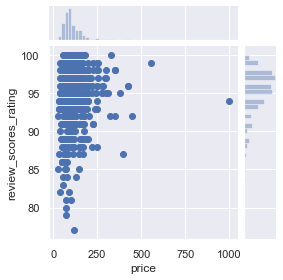

In [19]:
sb.jointplot(x = 'price', y = 'review_scores_rating',data=listing, height = 4)

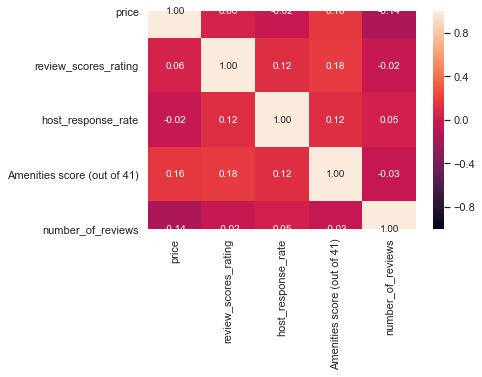

In [20]:
# correlation heat map with numerical features
data= listing[['price','review_scores_rating','host_response_rate','Amenities score (out of 41)','number_of_reviews']]
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

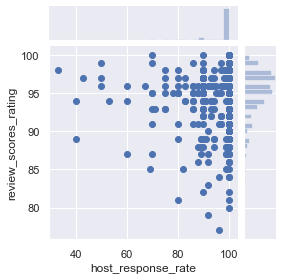

In [21]:
sb.jointplot(x = 'host_response_rate', y = 'review_scores_rating',data=listing, height = 4)

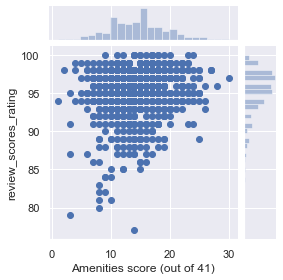

In [22]:
sb.jointplot(x = 'Amenities score (out of 41)', y = 'review_scores_rating',data=listing, height = 4)

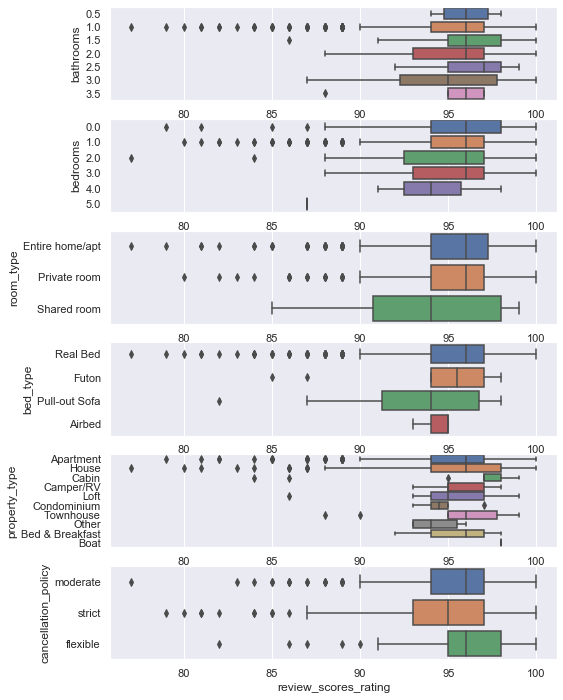

In [23]:
f, axes = plt.subplots(6, 1, figsize=(8, 12))
sb.boxplot(x = "review_scores_rating", y = "bathrooms", data = listing, orient = "h",ax =axes[0])
sb.boxplot(x = "review_scores_rating", y = "bedrooms", data = listing, orient = "h",ax =axes[1])
sb.boxplot(x = "review_scores_rating", y = "room_type", data = listing, orient = "h",ax =axes[2])
sb.boxplot(x = "review_scores_rating", y = "bed_type", data = listing, orient = "h",ax =axes[3])
sb.boxplot(x = "review_scores_rating", y = "property_type", data = listing, orient = "h",ax =axes[4])
sb.boxplot(x = "review_scores_rating", y = "cancellation_policy", data = listing, orient = "h",ax =axes[5])

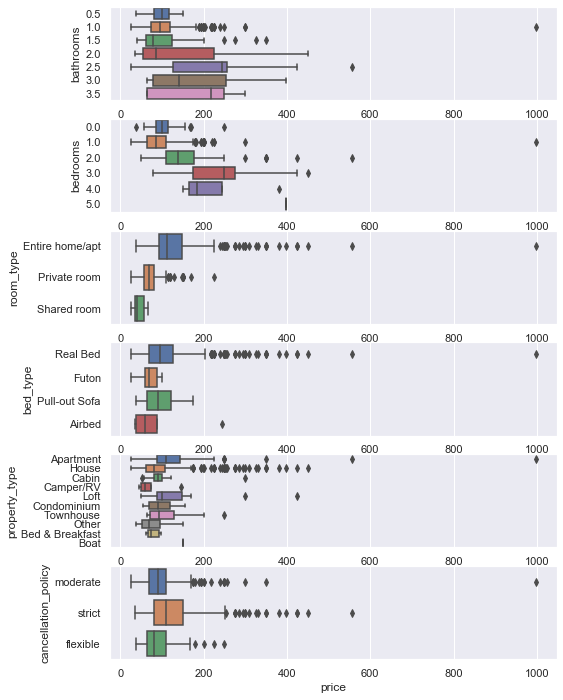

In [24]:
f, axes = plt.subplots(6, 1, figsize=(8, 12))
sb.boxplot(x = "price", y = "bathrooms", data = listing, orient = "h",ax =axes[0])
sb.boxplot(x = "price", y = "bedrooms", data = listing, orient = "h",ax =axes[1])
sb.boxplot(x = "price", y = "room_type", data = listing, orient = "h",ax =axes[2])
sb.boxplot(x = "price", y = "bed_type", data = listing, orient = "h",ax =axes[3])
sb.boxplot(x = "price", y = "property_type", data = listing, orient = "h",ax =axes[4])
sb.boxplot(x = "price", y = "cancellation_policy", data = listing, orient = "h",ax =axes[5])

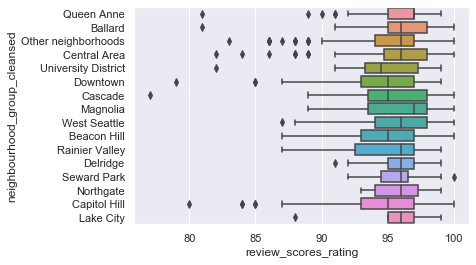

In [25]:
sb.boxplot(x ='review_scores_rating', y = 'neighbourhood_group_cleansed', data = listing, orient = "h")

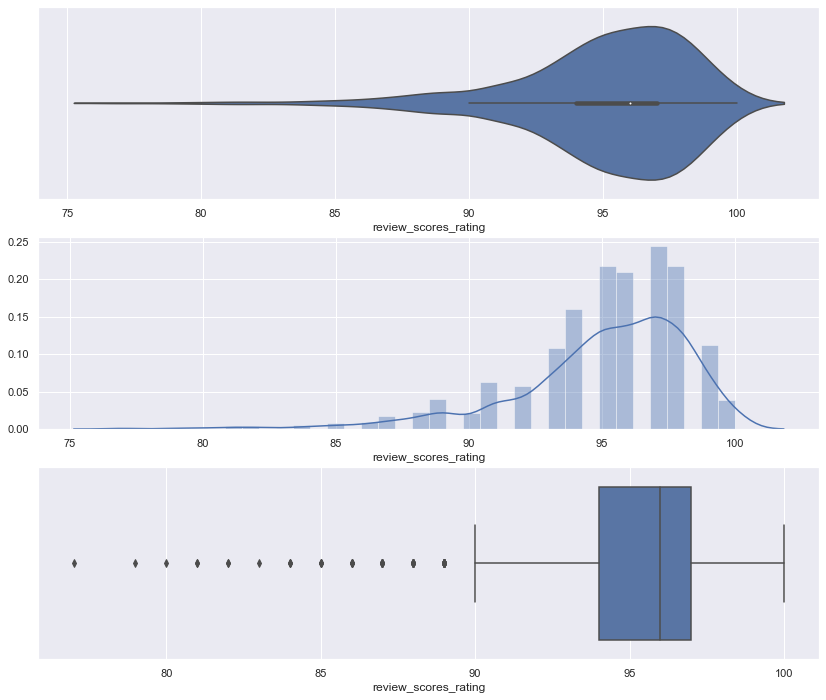

In [26]:
f, axes = plt.subplots(3, 1, figsize=(14, 12))
sb.violinplot(listing['review_scores_rating'],ax = axes[0])
sb.distplot(listing['review_scores_rating'],ax = axes[1])
sb.boxplot(listing['review_scores_rating'],ax = axes[2])

In [27]:
review_cat = []
listing = listing.reset_index(drop=True)
for item,row in listing.iterrows():
    if (row['review_scores_rating']<=100 and row['review_scores_rating']>=95):
        review_cat.append(9)
    if (row['review_scores_rating']<95 and row['review_scores_rating']>=90):
        review_cat.append(9)
    if (row['review_scores_rating']<90 and row['review_scores_rating']>=80):
        review_cat.append(8)
    if (row['review_scores_rating']<80 and row['review_scores_rating']>=70):
        review_cat.append(7)
    if (row['review_scores_rating']<70 and row['review_scores_rating']>=60):
        review_cat.append(6)
    if (row['review_scores_rating']<60 and row['review_scores_rating']>=50):
        review_cat.append(5)
    if (row['review_scores_rating']<50 and row['review_scores_rating']>=40):
        review_cat.append(4)
    if (row['review_scores_rating']<40 and row['review_scores_rating']>=30):
        review_cat.append(3)
    if (row['review_scores_rating']<30 and row['review_scores_rating']>=20):
        review_cat.append(2)
    if (row['review_scores_rating']<20 and row['review_scores_rating']>=10):
        review_cat.append(1)
    if (row['review_scores_rating']<10 and row['review_scores_rating']>=0):
        review_cat.append(0)

In [28]:
review_cat=pd.DataFrame(review_cat)
listing['review_cat']=review_cat
listing[['id','review_cat']]

,id,review_cat
0,241032,9
1,953595,9
2,278830,9
3,1909058,9
4,856550,9
...,...,...
817,2755730,9
818,3312406,9
819,609701,9
820,2614387,9


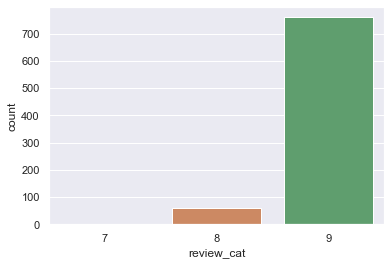

In [29]:
sb.countplot(listing['review_cat'])

In [30]:
listing['review_cat'].value_counts()

9    760
8     60
7      2
Name: review_cat, dtype: int64

### Bi-variate exploration with analyser_review_rating

In [31]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
reviews = pd.read_csv("C:/Users/Super User/Desktop/Sem2 courses/CZ1015/reviews.csv")

In [32]:
reviews['comments'] = '"' + reviews['comments'].astype(str) + '"'

In [33]:
sentences = pd.DataFrame(reviews['comments'])
sentences_ar = sentences.to_numpy()

In [34]:
scores =[]

for sentence in sentences_ar:
    score = analyser.polarity_scores(sentence)
    scores.append(score)


In [35]:
listing = listing[listing['review_scores_rating'].isnull()==False]
listing=listing.reset_index(drop=True)
listing

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Amenities score (out of 41),review_cat
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,...,NaN,WASHINGTON,f,moderate,f,f,2,4.07,10,9
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,...,NaN,WASHINGTON,f,strict,t,t,6,1.48,16,9
2,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,...,NaN,WASHINGTON,f,strict,f,f,1,0.89,13,9
3,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,"Close restaurants, coffee shops and grocery st...",The room now has a mini frig to keep your favo...,...,NaN,WASHINGTON,f,moderate,f,f,1,2.46,7,9
4,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",We are centrally located between Downtown and ...,There are three rentals in our back yard . If ...,...,NaN,WASHINGTON,f,strict,t,t,5,4.73,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,2755730,https://www.airbnb.com/rooms/2755730,20160104002432,2016-01-04,Your own 2 Bedroom home in Fremont,Private 2 bedroom retreat in the heart of Frem...,The house was built in 1906 by the Seattle Lum...,Private 2 bedroom retreat in the heart of Frem...,"Very walkable, with lots of bike lanes and qui...",NaN,...,NaN,WASHINGTON,t,strict,f,f,1,3.77,18,9
818,3312406,https://www.airbnb.com/rooms/3312406,20160104002432,2016-01-04,Seattle Urban-Chic Studio Cottage,Come stay at this 2014 Northwest Green Home To...,"Private, just-built, high-end studio loft in a...",Come stay at this 2014 Northwest Green Home To...,"Renowned restaurants, coffeshops and bars, the...",We occasionally have friends over for evening ...,...,NaN,WASHINGTON,t,strict,f,f,1,4.28,13,9
819,609701,https://www.airbnb.com/rooms/609701,20160104002432,2016-01-04,Charming Fremont Garden Cottage,Enjoy the excitement of Seattle and city life ...,Charming and pristine pied-a-terre in the mids...,Enjoy the excitement of Seattle and city life ...,FREMONT is such a fun neighborhood with lot's ...,Street parking is usually plentiful so help yo...,...,NaN,WASHINGTON,t,moderate,f,f,1,5.57,15,9
820,2614387,https://www.airbnb.com/rooms/2614387,20160104002432,2016-01-04,"Everything Seattle in 0-3 miles, A","Spacious 1 bedroom: private 3/4 bathroom, Quee...","New, modern, clean, quiet and no clutter, yet ...","Spacious 1 bedroom: private 3/4 bathroom, Quee...","I love everything about my neighborhood, Seatt...",A few blocks from the house is Manolin Seafood...,...,NaN,WASHINGTON,f,strict,f,f,2,5.95,19,9


In [36]:
scores_df = pd.DataFrame(scores)
reviews['score']=scores_df['compound']
analyser_review = []
for index, row in listing.iterrows():
    review = reviews['score'][reviews['listing_id'] == row['id']]
    analyser_review.append(review.mean())
analyser_review_rating=pd.DataFrame(analyser_review)
analyser_review_rating

,0
0,0.894372
1,0.897614
2,0.842034
3,0.899671
4,0.911999
...,...
817,0.937945
818,0.917797
819,0.927444
820,0.906073


In [37]:
y=analyser_review_rating
y=((y+1)/2)*100
y=y.round(2)
y

,0
0,94.72
1,94.88
2,92.10
3,94.98
4,95.60
...,...
817,96.90
818,95.89
819,96.37
820,95.30


In [38]:
listing['analyser_review_rating']=y

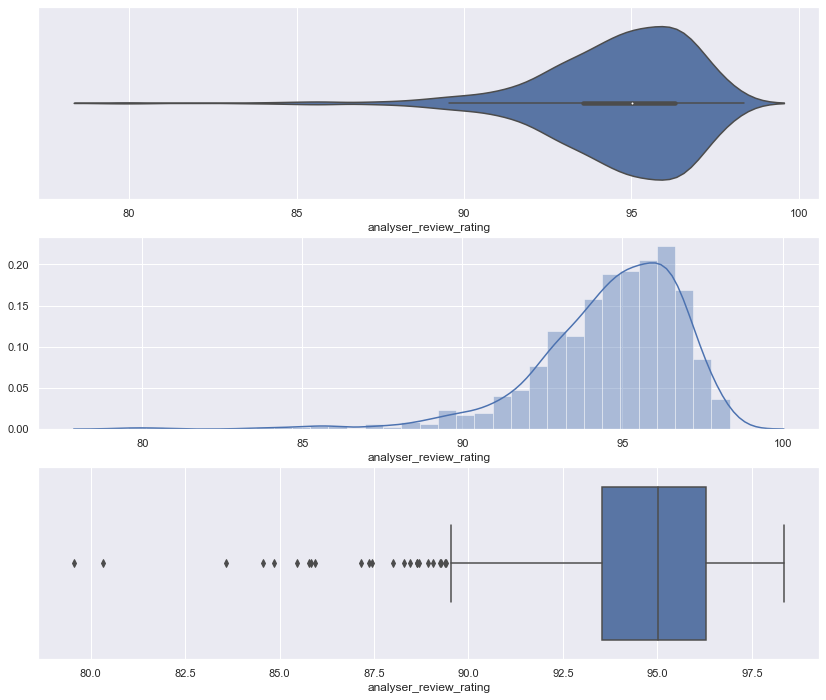

In [39]:
f, axes = plt.subplots(3, 1, figsize=(14, 12))
sb.violinplot(listing['analyser_review_rating'],ax = axes[0])
sb.distplot(listing['analyser_review_rating'],ax = axes[1])
sb.boxplot(listing['analyser_review_rating'],ax = axes[2])

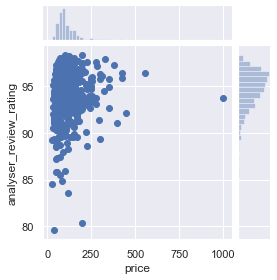

In [40]:
sb.jointplot(x = 'price', y = 'analyser_review_rating',data=listing, height = 4)

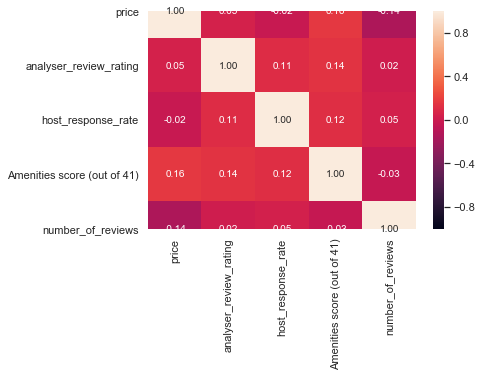

In [41]:
# correlation heat map with numerical features
data= listing[['price','analyser_review_rating','host_response_rate','Amenities score (out of 41)','number_of_reviews']]
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

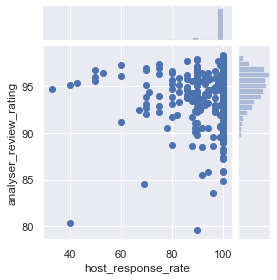

In [42]:
sb.jointplot(x = 'host_response_rate', y = 'analyser_review_rating',data=listing, height = 4)

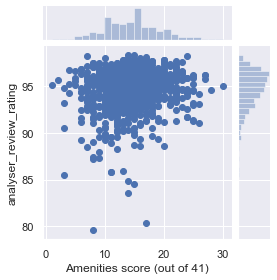

In [43]:
sb.jointplot(x = 'Amenities score (out of 41)', y = 'analyser_review_rating',data=listing, height = 4)

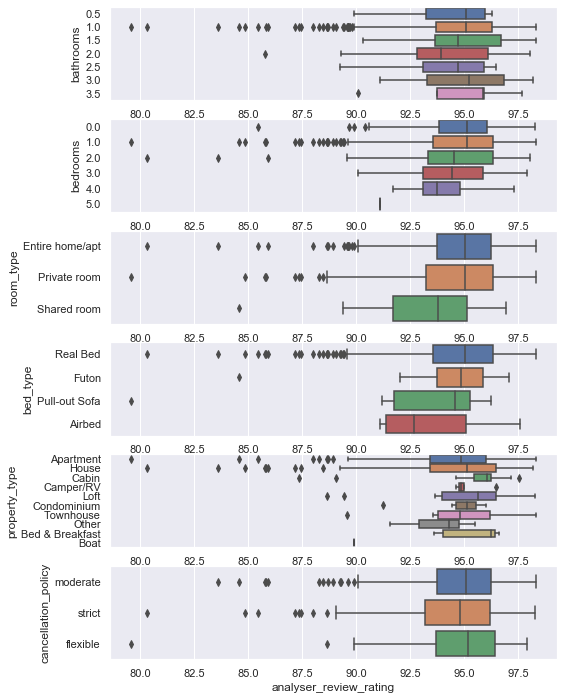

In [44]:
f, axes = plt.subplots(6, 1, figsize=(8, 12))
sb.boxplot(x = "analyser_review_rating", y = "bathrooms", data = listing, orient = "h",ax =axes[0])
sb.boxplot(x = "analyser_review_rating", y = "bedrooms", data = listing, orient = "h",ax =axes[1])
sb.boxplot(x = "analyser_review_rating", y = "room_type", data = listing, orient = "h",ax =axes[2])
sb.boxplot(x = "analyser_review_rating", y = "bed_type", data = listing, orient = "h",ax =axes[3])
sb.boxplot(x = "analyser_review_rating", y = "property_type", data = listing, orient = "h",ax =axes[4])
sb.boxplot(x = "analyser_review_rating", y = "cancellation_policy", data = listing, orient = "h",ax =axes[5])

In [45]:
review_cat = []
y=listing['analyser_review_rating']
for item,row in listing.iterrows():
    if (row['analyser_review_rating']<=100 and row['analyser_review_rating']>=95):
        review_cat.append(9)
    if (row['analyser_review_rating']<95 and row['analyser_review_rating']>=90):
        review_cat.append(9)
    if (row['analyser_review_rating']<90 and row['analyser_review_rating']>=80):
        review_cat.append(8)
    if (row['analyser_review_rating']<80 and row['analyser_review_rating']>=70):
        review_cat.append(7)
    if (row['analyser_review_rating']<70 and row['analyser_review_rating']>=60):
        review_cat.append(6)
    if (row['analyser_review_rating']<60 and row['analyser_review_rating']>=50):
        review_cat.append(5)
    if (row['analyser_review_rating']<50 and row['analyser_review_rating']>=40):
        review_cat.append(4)
    if (row['analyser_review_rating']<40 and row['analyser_review_rating']>=30):
        review_cat.append(3)
    if (row['analyser_review_rating']<30 and row['analyser_review_rating']>=20):
        review_cat.append(2)
    if (row['analyser_review_rating']<20 and row['analyser_review_rating']>=10):
        review_cat.append(1)
    if (row['analyser_review_rating']<10 and row['analyser_review_rating']>=0):
        review_cat.append(0)

In [46]:
review_cat=pd.DataFrame(review_cat)
listing['review_cat']=review_cat
listing['review_cat']

0      9
1      9
2      9
3      9
4      9
      ..
817    9
818    9
819    9
820    9
821    9
Name: review_cat, Length: 822, dtype: int64

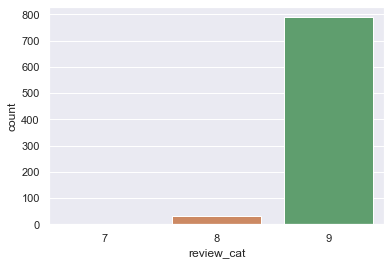

In [47]:
sb.countplot(listing['review_cat'])

In [48]:
listing['review_cat'].value_counts()

9    789
8     32
7      1
Name: review_cat, dtype: int64

### Analysis for second model

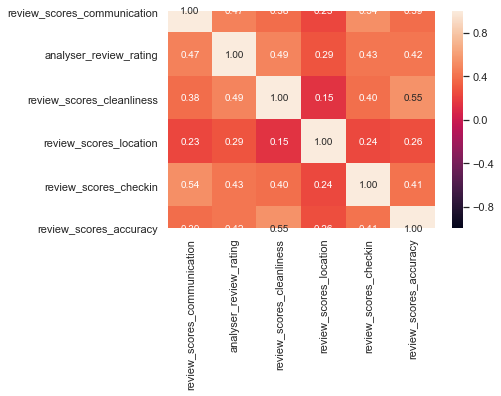

In [49]:
# correlation heat map with numerical features
data= listing[['review_scores_communication','analyser_review_rating','review_scores_cleanliness','review_scores_location','review_scores_checkin','review_scores_accuracy']]
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

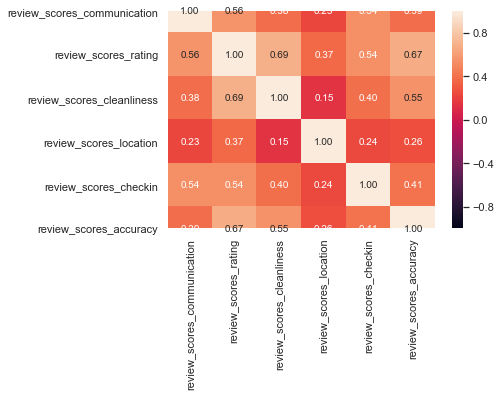

In [50]:
# correlation heat map with numerical features
data= listing[['review_scores_communication','review_scores_rating','review_scores_cleanliness','review_scores_location','review_scores_checkin','review_scores_accuracy']]
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")